# 基礎

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
pio.templates
from matplotlib.ticker import StrMethodFormatter
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelBinarizer

import warnings
warnings.filterwarnings('ignore')

In [2]:
# サンプルデータセット：titanic
df_train = pd.read_csv('data/train.csv')
df_test = pd.read_csv('data/test.csv')
df_gender = pd.read_csv('data/gender_submission.csv')

## データ可視化

In [3]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df_gender.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [5]:
# カラムの確認
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


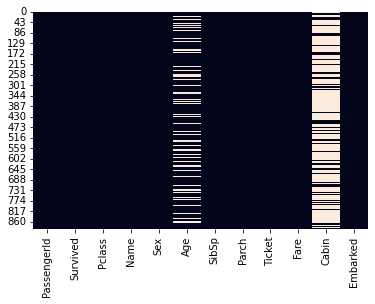

In [6]:
# 欠損の確認
sns.heatmap(df_train.isnull(), cbar=False);

In [7]:
# 生存率の確認
women = df_train.loc[df_train['Sex'] == 'female']['Survived']
rate_women = sum(women)/len(women)
men = df_train.loc[df_train['Sex'] == 'male']['Survived']
rate_men = sum(men)/len(men)

print('% of women who survived:', rate_women)
print('% of men who survived:', rate_men)

% of women who survived: 0.7420382165605095
% of men who survived: 0.18890814558058924


In [8]:
data = [df_train, df_test]
for dataset in data:
    mean = df_train['Age'].mean()
    std = df_test['Age'].std()
    is_null = dataset['Age'].isnull().sum()
    # compute random numbers between the mean, std and is_null
    rand_age = np.random.randint(mean - std, mean + std, size = is_null)
    # fill NaN values in Age column with random values generated
    age_slice = dataset['Age'].copy()
    age_slice[np.isnan(age_slice)] = rand_age
    dataset['Age'] = age_slice
    dataset['Age'] = df_train['Age'].astype(int)

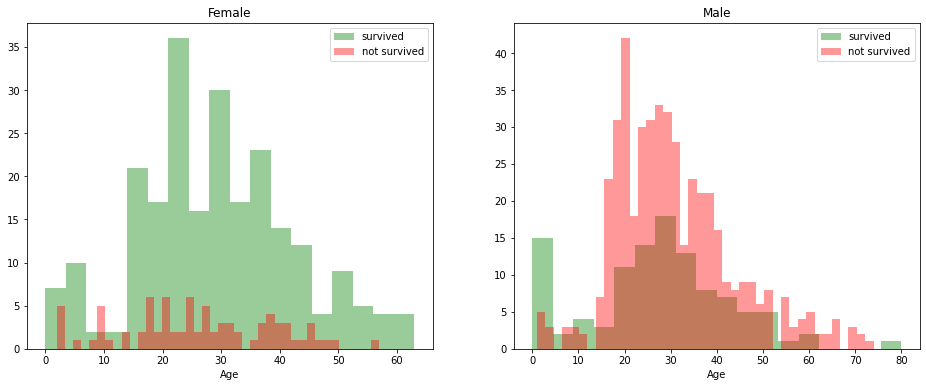

In [9]:
survived = 'survived'
not_survived = 'not survived'
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(16, 6))
women = df_train[df_train['Sex']=='female']
men = df_train[df_train['Sex']=='male']
ax = sns.distplot(women[women['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[0], kde =False, color='green')
ax = sns.distplot(women[women['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[0], kde =False, color='red')
ax.legend()
ax.set_title('Female')
ax = sns.distplot(men[men['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[1], kde = False, color='green')
ax = sns.distplot(men[men['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[1], kde = False, color='red')
ax.legend()
_ = ax.set_title('Male');

In [10]:
fig = px.scatter_3d(df_train, x='Name', y='Sex', z='Age', color='Age')
fig.show()

![plot](image/newplot.png)

In [11]:
for template in ['plotly']:
    fig = px.scatter(df_train,
                     x='PassengerId', y='Age', color='Survived',
                     log_x=True, size_max=20,
                     template=template, title='Which Age Survived?')
    fig.show()

![plot_01](image/newplot_01.png)

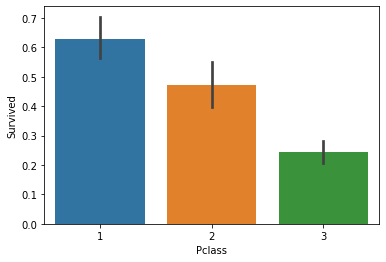

In [12]:
sns.barplot(x='Pclass', y='Survived', data=df_train);

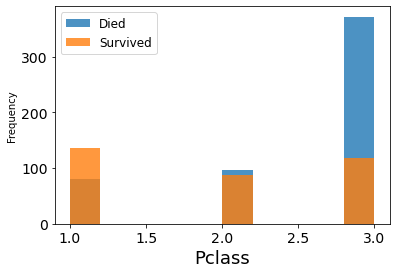

In [13]:
plt.rc('xtick', labelsize=14) 
plt.rc('ytick', labelsize=14)

plt.figure()
fig = df_train.groupby('Survived')['Pclass'].plot.hist(histtype='bar', alpha=0.8)
plt.legend(('Died','Survived'), fontsize = 12)
plt.xlabel('Pclass', fontsize = 18)
plt.show()

In [14]:
embarked_mode = df_train['Embarked'].mode()
data = [df_train, df_test]
for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].fillna(embarked_mode)

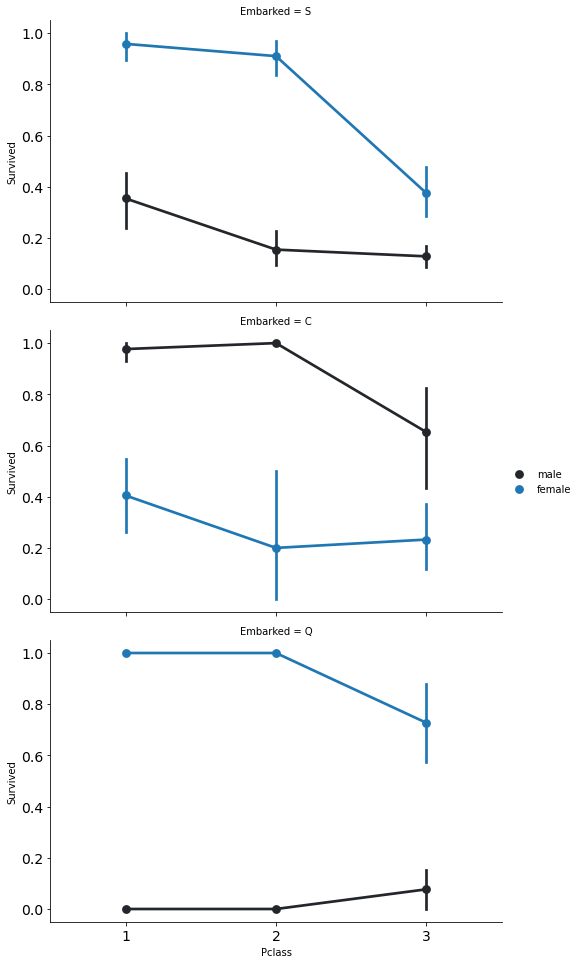

In [15]:
FacetGrid = sns.FacetGrid(df_train, row='Embarked', size=4.5, aspect=1.6)
FacetGrid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', order=None, hue_order=None )
FacetGrid.add_legend();

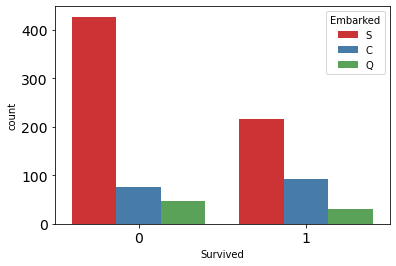

In [16]:
sns.countplot( x='Survived', data=df_train, hue='Embarked', palette='Set1');

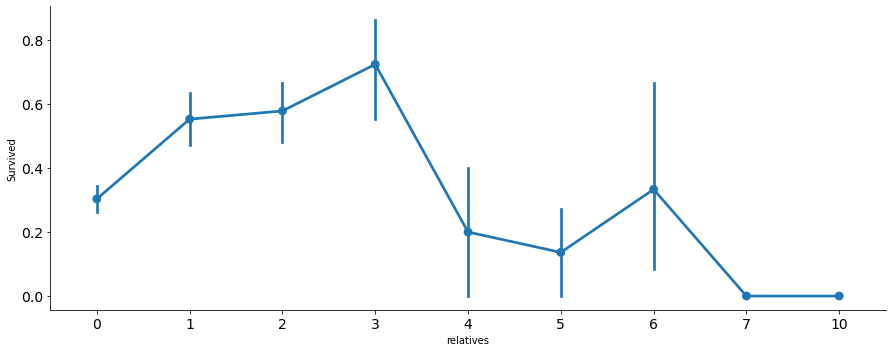

In [17]:
data = [df_train, df_test]
for dataset in data:
    dataset['relatives'] = dataset['SibSp'] + dataset['Parch']
    dataset.loc[dataset['relatives'] > 0, 'travelled_alone'] = 'No'
    dataset.loc[dataset['relatives'] == 0, 'travelled_alone'] = 'Yes'
axes = sns.factorplot('relatives','Survived', 
                      data=df_train, aspect = 2.5, );

In [18]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,relatives,travelled_alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,1,No
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,1,No
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,0,Yes
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,1,No
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,0,Yes


In [19]:
fig = px.histogram(df_train, x='SibSp', y='Parch', color='Sex', marginal='rug', hover_data=df_train.columns)
fig.show()

![plot_02](image/newplot_02.png)

In [20]:
for template in ['plotly_dark']:
    fig = px.scatter(df_gender,
                     x='PassengerId', y='Survived', color='Survived',
                     log_x=True, size_max=20,
                     template=template, title="Survived or Died?")
    fig.show()

![plot_03](image/newplot_03.png)

## 前処理

### 連続変数 (Numeric)

In [21]:
# 連続値のみ取得
def create_numeric(input_df):
    use_cols = [
        'Pclass',
        'Age',
        'SibSp',
        'Parch'
    ]

    return input_df[use_cols].copy()

### カテゴリ系のカラム

#### CountEncoding

```
[1, 1, 1, 2]->[3, 3, 3, 1]
```

In [22]:
def create_count_encoding(input_df):

    use_columns = [
        'Sex',
        'Embarked'
    ]

    out_df = pd.DataFrame()
    for column in use_columns:
        # df_train を基盤とする
        vc = df_train[column].value_counts()
        out_df[column] = input_df[column].map(vc)

    return out_df.add_prefix('CE_')

#### OneHotEncoding

```python
['a', 'b', 'a'] -> 

[
    [1, 0],
    [0, 1],
    [1, 0]
]
```

In [23]:
def create_one_hot_encoding(input_df):

    use_columns = [
        'Sex',
        'Embarked'
    ]

    out_df = pd.DataFrame()
    for column in use_columns:

        vc = df_train[column].value_counts()
        # vc = vc[vc > 20] # カテゴリ数が多い場合に使用
        cat = pd.Categorical(input_df[column], categories=vc.index)
        # このタイミングで one-hot 化
        out_i = pd.get_dummies(cat)
        # column が Catgory 型として認識されているので list にして解除する (こうしないと concat でエラーになる)
        out_i.columns = out_i.columns.tolist()
        out_i = out_i.add_prefix(f'{column}=')
        out_df = pd.concat([out_df, out_i], axis=1)
    return out_df

### 前処理（特徴量エンジニアリング）を関数化

In [24]:
from tqdm import tqdm

def to_feature(input_df):

    processors = [
        create_numeric,
        create_count_encoding,
        create_one_hot_encoding
    ]

    out_df = pd.DataFrame()

    for func in tqdm(processors, total=len(processors)):
        _df = func(input_df)

        # データ数が一致しているか確認（ずれている場合　func の実装がおかしいことがわかる）
        assert len(_df) == len(input_df), func.__name__
        out_df = pd.concat([out_df, _df], axis=1)

    return out_df

In [25]:
df_train_feature = to_feature(df_train)
df_test_feature = to_feature(df_test)

100%|██████████| 3/3 [00:00<00:00, 483.25it/s]


## Model : Classification

In [26]:
import lightgbm as lgbm
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score

def fit_lgbm(X,
             y,
             cv,
             params: dict=None,
             verbose: int=500):

    if params is None:
        params = {}

    models = []
    oof_pred = np.zeros_like(y, dtype=np.float)

    for i, (idx_train, idx_valid) in enumerate(cv):
        x_train, y_train = X[idx_train], y[idx_train]
        x_valid, y_valid = X[idx_valid], y[idx_valid]

        clf = lgbm.LGBMClassifier(**params)

        clf.fit(x_train, y_train,
                eval_set=[(x_valid, y_valid)],
                early_stopping_rounds=100,
                verbose=verbose)

        pred_i = clf.predict(x_valid)
        oof_pred[idx_valid] = pred_i
        models.append(clf)
        print(f'Fold {i} ROC-AUC: {roc_auc_score(y_valid, pred_i) ** .5:.4f}')

    score = roc_auc_score(y, oof_pred) ** .5
    print('-' * 50)
    print('FINISHED | Whole ROC-AUC: {:.4f}'.format(score))
    return oof_pred, models

In [27]:
params = {
    'objective': 'binary',
    'boosting': 'gbdt',
    'metric': 'binary_logloss',
    'learning_rate': .1,
    'reg_lambda': 1.,
    'reg_alpha': .1,
    'max_depth': 5,
    'n_estimators': 10000,
    'colsample_bytree': .5,
    'min_child_samples': 10,
    'subsample_freq': 3,
    'subsample': .9,
    'importance_type': 'gain',
    'random_state': 71,
}

In [28]:
from sklearn.model_selection import KFold

fold = KFold(n_splits=5, shuffle=True, random_state=71)
y = df_train['Survived']
cv = list(fold.split(df_train_feature, y))

oof, models = fit_lgbm(df_train_feature.values, y, cv, params=params, verbose=500)

[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[52]	valid_0's binary_logloss: 0.381467
Fold 0 ROC-AUC: 0.8905
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[65]	valid_0's binary_logloss: 0.434746
Fold 1 ROC-AUC: 0.8965
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[60]	valid_0's binary_logloss: 0.422201
Fold 2 ROC-AUC: 0.8978
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
Training until validation scores don't improve for 100 rounds
Early stopping, best itera

In [29]:
def visualize_importance(models, df_train_feature):
    """lightGBM の model 配列の feature importance を plot する
    CVごとのブレを boxen plot として表現.

    args:
        models:
            List of lightGBM models
        feat_train_df:
            学習時に使った DataFrame
    """
    feature_importance_df = pd.DataFrame()
    for i, model in enumerate(models):
        _df = pd.DataFrame()
        _df['feature_importance'] = model.feature_importances_
        _df['column'] = df_train_feature.columns
        _df['fold'] = i + 1
        feature_importance_df = pd.concat([feature_importance_df, _df],
                                          axis=0, ignore_index=True)

    order = feature_importance_df.groupby('column')\
        .sum()[['feature_importance']]\
        .sort_values('feature_importance', ascending=False).index[:50]

    fig, ax = plt.subplots(figsize=(8, max(6, len(order) * .25)))
    sns.boxenplot(data=feature_importance_df,
                  x='feature_importance',
                  y='column',
                  order=order,
                  ax=ax,
                  palette='viridis',
                  orient='h')
    ax.tick_params(axis='x', rotation=90)
    ax.set_title('Importance')
    ax.grid()
    fig.tight_layout()
    return fig, ax

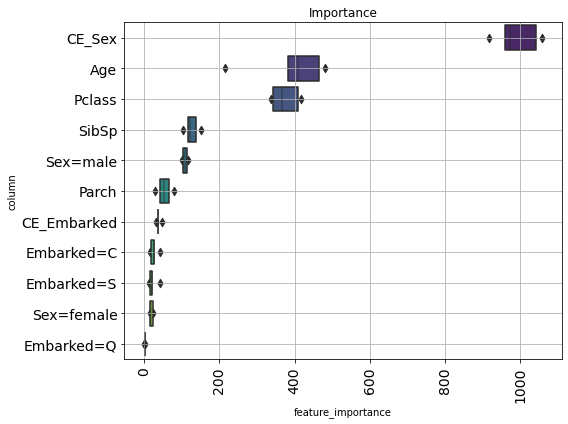

In [30]:
fig, ax = visualize_importance(models, df_train_feature)

## Model : Regression

In [31]:
from sklearn.datasets import fetch_california_housing
data = fetch_california_housing()
df = pd.DataFrame(data['data'], columns=data['feature_names'])
y = data['target']

In [32]:
from sklearn.model_selection import train_test_split
df_train, df_test, y_train, y_test  = train_test_split(df, y, train_size=0.7, random_state=0)
len(df_train), len(df_test), len(y_train), len(y_test)

(14447, 6193, 14447, 6193)

In [33]:
import lightgbm as lgbm
from sklearn.metrics import mean_squared_error

def fit_lgbm(X,
             y,
             cv,
             params: dict=None,
             verbose: int=500):

    if params is None:
        params = {}

    models = []
    oof_pred = np.zeros_like(y, dtype=np.float)

    for i, (idx_train, idx_valid) in enumerate(cv):
        x_train, y_train = X[idx_train], y[idx_train]
        x_valid, y_valid = X[idx_valid], y[idx_valid]

        clf = lgbm.LGBMRegressor(**params)

        clf.fit(x_train, y_train,
                eval_set=[(x_valid, y_valid)],
                early_stopping_rounds=100,
                verbose=verbose)

        pred_i = clf.predict(x_valid)
        oof_pred[idx_valid] = pred_i
        models.append(clf)
        print(f'Fold {i} RMSE: {mean_squared_error(y_valid, pred_i) ** .5:.4f}')

    score = mean_squared_error(y, oof_pred) ** .5
    print('-' * 50)
    print('FINISHED | Whole RMSE: {:.4f}'.format(score))
    return oof_pred, models

In [34]:
params = {
    'objective': 'rmse',
    'learning_rate': .1,
    'reg_lambda': 1.,
    'reg_alpha': .1,
    'max_depth': 5,
    'n_estimators': 10000,
    'colsample_bytree': .5,
    'min_child_samples': 10,
    'subsample_freq': 3,
    'subsample': .9,
    'importance_type': 'gain',
    'random_state': 71,
}

In [35]:
from sklearn.model_selection import KFold

fold = KFold(n_splits=5, shuffle=True, random_state=71)
cv = list(fold.split(df_train, y_train)) # もともとが generator なため明示的に list に変換する

oof, models = fit_lgbm(df_train.values, y_train, cv, params=params, verbose=500)

Training until validation scores don't improve for 100 rounds
[500]	valid_0's rmse: 0.463818
[1000]	valid_0's rmse: 0.46033
Early stopping, best iteration is:
[984]	valid_0's rmse: 0.459897
Fold 0 RMSE: 0.4599
Training until validation scores don't improve for 100 rounds
[500]	valid_0's rmse: 0.438333
Early stopping, best iteration is:
[584]	valid_0's rmse: 0.437437
Fold 1 RMSE: 0.4374
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[373]	valid_0's rmse: 0.46471
Fold 2 RMSE: 0.4647
Training until validation scores don't improve for 100 rounds
[500]	valid_0's rmse: 0.500634
Early stopping, best iteration is:
[498]	valid_0's rmse: 0.500504
Fold 3 RMSE: 0.5005
Training until validation scores don't improve for 100 rounds
[500]	valid_0's rmse: 0.449492
Early stopping, best iteration is:
[552]	valid_0's rmse: 0.449004
Fold 4 RMSE: 0.4490
--------------------------------------------------
FINISHED | Whole RMSE: 0.4628


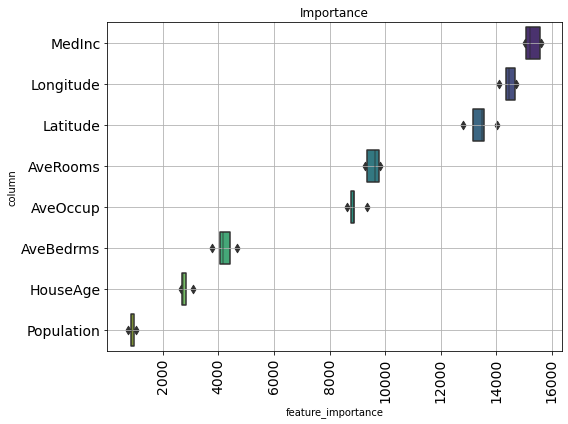

In [36]:
fig, ax = visualize_importance(models, df_train)

In [37]:
# 推論
pred = np.array([model.predict(df_test.values) for model in models])
pred = np.mean(pred, axis=0)

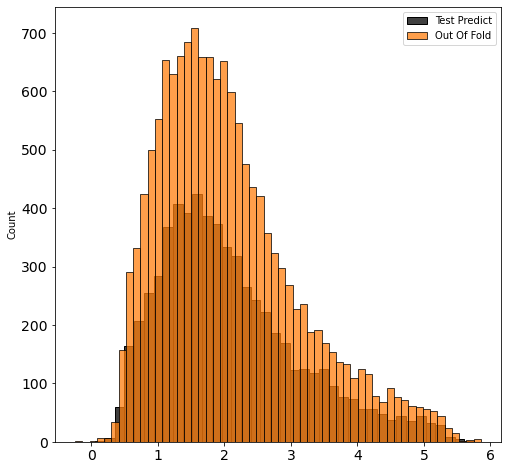

In [38]:
fig, ax = plt.subplots(figsize=(8, 8))
sns.histplot(pred, label='Test Predict', ax=ax, color='black')
sns.histplot(oof, label='Out Of Fold', ax=ax, color='C1')
ax.legend();